# A Gentle Introduction to Anomaly Detection in Merlion

We begin by importing Merlion's `TimeSeries` class and the data loader for the Numenta Anomaly Benchmark `NAB`. We can then divide this data into training and testing splits.

In [1]:
from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB

time_series, metadata = NAB(subset="realKnownCause")[3]
train_data = TimeSeries.from_pd(time_series[metadata.trainval])
test_data = TimeSeries.from_pd(time_series[~metadata.trainval])
test_labels = TimeSeries.from_pd(metadata.anomaly[~metadata.trainval])

Time series /Users/abhatnagar/Desktop/Merlion/data/nab/realKnownCause/ec2_request_latency_system_failure.csv (index 2) has timestamp duplicates. Kept first values.
Time series /Users/abhatnagar/Desktop/Merlion/data/nab/realKnownCause/machine_temperature_system_failure.csv (index 3) has timestamp duplicates. Kept first values.


We can then initialize and train Merlion's `DefaultDetector`, which is an anomaly detection model that balances performance with efficiency. We also obtain its predictions on the test split.

In [2]:
from merlion.models.defaults import DefaultDetectorConfig, DefaultDetector
model = DefaultDetector(DefaultDetectorConfig())
model.train(train_data=train_data)
test_pred = model.get_anomaly_label(time_series=test_data)

Next, we visualize the model's predictions.

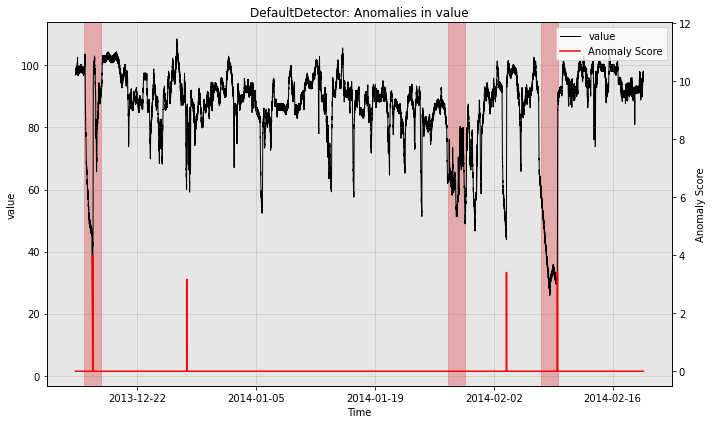

In [3]:
from merlion.plot import plot_anoms
import matplotlib.pyplot as plt
fig, ax = model.plot_anomaly(time_series=test_data)
plot_anoms(ax=ax, anomaly_labels=test_labels)
plt.show()

Finally, we can quantitatively evaluate the model. The precision and recall come from the fact that the model fired 4 alarms, with 2 true positives, 1 false negative, and 2 false positives. We also evaluate the mean time the model took to detect each anomaly that it correctly detected.

In [4]:
from merlion.evaluate.anomaly import TSADMetric
p = TSADMetric.Precision.value(ground_truth=test_labels, predict=test_pred)
r = TSADMetric.Recall.value(ground_truth=test_labels, predict=test_pred)
f1 = TSADMetric.F1.value(ground_truth=test_labels, predict=test_pred)
mttd = TSADMetric.MeanTimeToDetect.value(ground_truth=test_labels, predict=test_pred)
print(f"Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}\n"
      f"Mean Time To Detect: {mttd}")

Precision: 0.5000, Recall: 0.6667, F1: 0.5714
Mean Time To Detect: 1 days 10:25:00
